# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\AnacondaInstall\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv('NEWSAPI_KEY')

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='publishedAt'
)
btc_headlines['totalResults']
btc_articles = btc_headlines['articles']
btc_articles

[{'source': {'id': None, 'name': 'Finextra'},
  'author': 'Editorial Team',
  'title': 'BitPay joins Square-founded crypto patent effort',
  'description': 'BitPay, the world’s largest provider of Bitcoin and cryptocurrency payment services, today announced a partnership with the Crypto Open Patent Alliance (COPA) to share open source projects and use a shared patent library.',
  'url': 'https://www.finextra.com/pressarticle/87121/bitpay-joins-square-founded-crypto-patent-effort',
  'urlToImage': 'https://www.finextra.com/about/finextra-logo.png',
  'publishedAt': '2021-04-14T20:05:11Z',
  'content': 'BitPay, the worlds largest provider of Bitcoin and cryptocurrency payment services, today announced a partnership with the Crypto Open Patent Alliance (COPA) to share open source projects and use a s… [+2068 chars]'},
 {'source': {'id': 'business-insider', 'name': 'Business Insider'},
  'author': 'Carla Mozée',
  'title': 'US stocks slip from record highs as tech sell-off overshadows bloc

In [6]:
btc_headlines

{'status': 'ok',
 'totalResults': 8577,
 'articles': [{'source': {'id': None, 'name': 'Finextra'},
   'author': 'Editorial Team',
   'title': 'BitPay joins Square-founded crypto patent effort',
   'description': 'BitPay, the world’s largest provider of Bitcoin and cryptocurrency payment services, today announced a partnership with the Crypto Open Patent Alliance (COPA) to share open source projects and use a shared patent library.',
   'url': 'https://www.finextra.com/pressarticle/87121/bitpay-joins-square-founded-crypto-patent-effort',
   'urlToImage': 'https://www.finextra.com/about/finextra-logo.png',
   'publishedAt': '2021-04-14T20:05:11Z',
   'content': 'BitPay, the worlds largest provider of Bitcoin and cryptocurrency payment services, today announced a partnership with the Crypto Open Patent Alliance (COPA) to share open source projects and use a s… [+2068 chars]'},
  {'source': {'id': 'business-insider', 'name': 'Business Insider'},
   'author': 'Carla Mozée',
   'title': 'US 

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headlines = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='publishedAt'
)
eth_headlines['totalResults']

2698

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []
for article in btc_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,neutral,positive,text
0,0.2960,0.000,0.932,0.068,"BitPay, the worlds largest provider of Bitcoin..."
1,-0.5267,0.086,0.914,0.000,Traders work on the floor of the New York Stoc...
2,0.4215,0.000,0.926,0.074,Today is the day everyone in crypto has been w...
3,0.8885,0.000,0.716,0.284,Could there be strong bipartisan agreement on ...
4,0.7178,0.000,0.838,0.162,Most United States stocks are rising Wednesday...


In [9]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []
for article in eth_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,neutral,positive,text
0,0.0000,0.0,1.000,0.000,"Mike Novogratz, the CEO of Galaxy Digital, sai..."
1,0.8316,0.0,0.808,0.192,With all of the industrys eyes are focused on ...
2,0.9423,0.0,0.629,0.371,Editor's note: Seeking Alpha is proud to welco...
3,0.9423,0.0,0.629,0.371,Editor's note: Seeking Alpha is proud to welco...
4,0.3167,0.0,0.919,0.081,"<ul><li>Medical technology company, BioSig Tec..."


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.215010,0.050800,0.845000,0.104250
std,0.513855,0.090379,0.116494,0.117107
min,-0.802000,0.000000,0.629000,0.000000
25%,-0.081925,0.000000,0.807750,0.000000
50%,0.173800,0.000000,0.851500,0.069000
75%,0.608375,0.086000,0.927500,0.136500
max,0.942300,0.355000,1.000000,0.371000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.00000,20.000000
mean,0.353400,0.01285,0.87550,0.111650
std,0.383304,0.02706,0.10402,0.109533
min,-0.340000,0.00000,0.62900,0.000000
25%,0.000000,0.00000,0.83800,0.034500
50%,0.316700,0.00000,0.89450,0.081000
75%,0.694000,0.00000,0.93900,0.162000
max,0.942300,0.07900,1.00000,0.371000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    # Create a list of the words

    # Convert the words to lowercase
    
    # Remove the punctuation
    
    # Remove the stop words
    
    # Lemmatize Words into root words
    
    return tokens


In [16]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.2960,0.000,0.932,0.068,"BitPay, the worlds largest provider of Bitcoin...","[bitpay, world, largest, provider, bitcoin, cr..."
1,-0.5267,0.086,0.914,0.000,Traders work on the floor of the New York Stoc...,"[traders, work, floor, new, york, stock, excha..."
2,0.4215,0.000,0.926,0.074,Today is the day everyone in crypto has been w...,"[today, day, everyone, crypto, ha, waiting, po..."
3,0.8885,0.000,0.716,0.284,Could there be strong bipartisan agreement on ...,"[could, strong, bipartisan, agreement, importa..."
4,0.7178,0.000,0.838,0.162,Most United States stocks are rising Wednesday...,"[united, states, stock, rising, wednesday, fat..."


In [17]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.0,1.000,0.000,"Mike Novogratz, the CEO of Galaxy Digital, sai...","[mike, novogratz, ceo, galaxy, digital, said, ..."
1,0.8316,0.0,0.808,0.192,With all of the industrys eyes are focused on ...,"[industry, eye, focused, coinbases, nasdaq, li..."
2,0.9423,0.0,0.629,0.371,Editor's note: Seeking Alpha is proud to welco...,"[editors, note, seeking, alpha, proud, welcome..."
3,0.9423,0.0,0.629,0.371,Editor's note: Seeking Alpha is proud to welco...,"[editors, note, seeking, alpha, proud, welcome..."
4,0.3167,0.0,0.919,0.081,"<ul><li>Medical technology company, BioSig Tec...","[ullimedical, technology, company, biosig, tec..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_words = ' '.join(btc_df['text'])
processed = tokenizer(btc_words)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('seeking', 'alpha'), 4),
 (('via', 'getty'), 3),
 (('new', 'york'), 2),
 (('record', 'high'), 2),
 (('digital', 'currency'), 2),
 (('stock', 'rising'), 2),
 (('rising', 'wednesday'), 2),
 (('whats', 'expected'), 2),
 (('expected', 'thunderous'), 2),
 (('thunderous', 'earnings'), 2)]

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_words = ' '.join(eth_df['text'])
processed = tokenizer(eth_words)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('seeking', 'alpha'), 4),
 (('global', 'inc'), 4),
 (('char', 'bloomberg'), 3),
 (('cryptocurrency', 'exchange'), 3),
 (('direct', 'listing'), 3),
 (('char', 'editors'), 2),
 (('editors', 'note'), 2),
 (('note', 'seeking'), 2),
 (('alpha', 'proud'), 2),
 (('proud', 'welcome'), 2)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_words = ' '.join(btc_df['text'])
processed = tokenizer(btc_words)
token_count(processed)

[('char', 18),
 ('stock', 6),
 ('bitcoin', 5),
 ('crypto', 5),
 ('new', 5),
 ('high', 5),
 ('company', 5),
 ('wednesday', 4),
 ('coinbase', 4),
 ('price', 4)]

In [23]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_words = ' '.join(eth_df['text'])
processed = tokenizer(eth_words)
token_count(processed)

[('char', 20),
 ('company', 6),
 ('inc', 6),
 ('coinbase', 5),
 ('nasdaq', 5),
 ('exchange', 5),
 ('global', 5),
 ('wednesday', 4),
 ('public', 4),
 ('listing', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

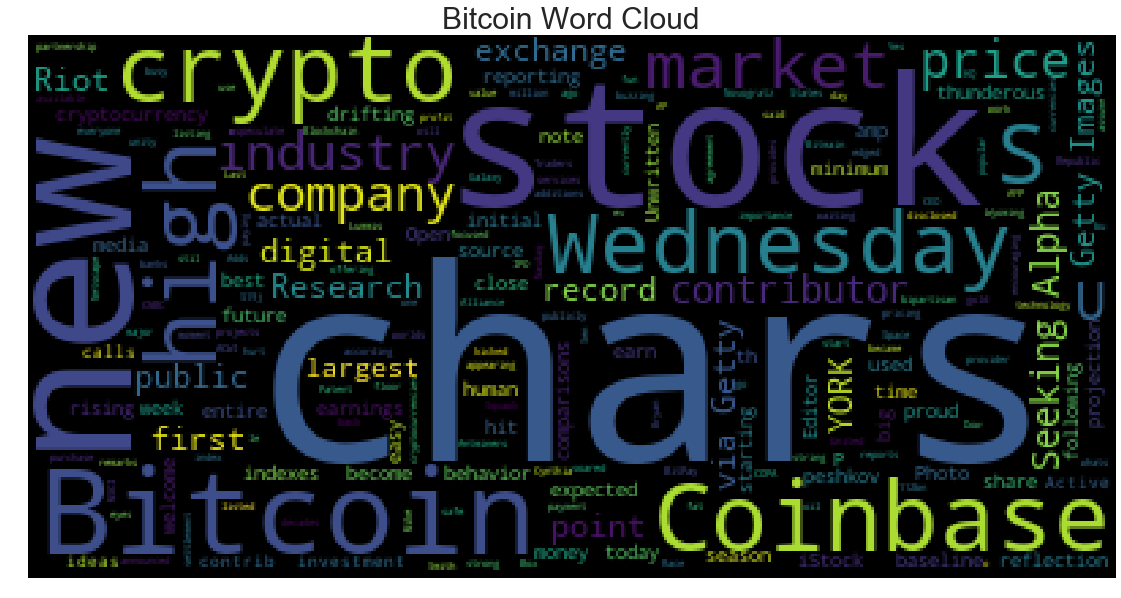

In [25]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud()
btc_string = ' '.join(btc_df['text'])
btc_wc = wc.generate(btc_string)
plt.imshow(btc_wc)
plt.axis('off')
plt.title(label='Bitcoin Word Cloud', size=(30))


Text(0.5, 1.0, 'Ethereum Word Cloud')

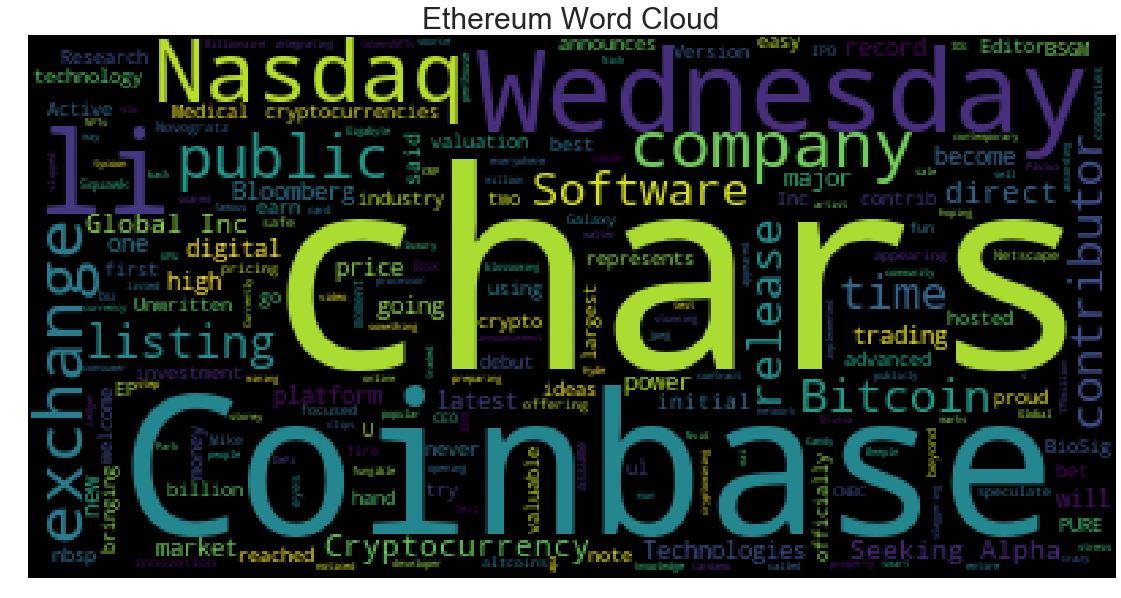

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_string = ' '.join(eth_df['text'])
eth_wc = wc.generate(eth_string)
plt.imshow(eth_wc)
plt.axis('off')
plt.title(label='Ethereum Word Cloud', size=(30))

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_string

'BitPay, the worlds largest provider of Bitcoin and cryptocurrency payment services, today announced a partnership with the Crypto Open Patent Alliance (COPA) to share open source projects and use a s… [+2068 chars] Traders work on the floor of the New York Stock Exchange.\r\nBryan R. Smith / AFP via Getty Images\r\nUS stocks edged back from record highs Wednesday, with the S&amp;P 500 index hurt as technology share… [+1816 chars] Today is the day everyone in crypto has been waiting for: popular Bitcoin exchange Coinbase has been publicly listed on the stock market for the first time ever.\r\nThe entire industry is buzzing, stil… [+2610 chars] Could there be strong bipartisan agreement on the importance of digital currencies, just like there was unity on the Space Race decades ago?Yes, according to Sen. Cynthia Lummis, the Wyoming Republic… [+1136 chars] Most United States stocks are rising Wednesday after fat profit reports from big banks kicked off whats expected to be a thunderous e

In [30]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(btc_string)
# Add a title to the document
# YOUR CODE HERE!

In [31]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [38]:
# List all Entities
# YOUR CODE HERE!
for word in btc_doc.ents:
    print(word.text, word.label_)

today DATE
the Crypto Open Patent Alliance ORG
the New York Stock Exchange ORG
Bryan R. Smith PERSON
Getty Images ORG
US GPE
Wednesday DATE
500 CARDINAL
first ORDINAL
the Space Race FAC
decades DATE
Cynthia Lummis PERSON
the Wyoming Republic GPE
United States GPE
Wednesday DATE
Mike Novogratz PERSON
Galaxy Digital ORG
Wednesday DATE
Coinbase NORP
Netscape WORK_OF_ART
CNBC ORG
Squawk Box PERSON
Last week DATE
Riot Blockchain PERSON
First ORDINAL
42,000 CARDINAL
Bitmain S19j Antminers ORG
Riot PERSON
$138.5 million MONEY
Coinbase NORP
112bn MONEY
first ORDINAL
US GPE
NEW YORK GPE
AP ORG
U.S. GPE
Wednesday DATE
Coinbases Nasdaq PERSON
500 CARDINAL
Dow ORG
MSCI ACWI PERSON
three-week DATE
NEW YORK GPE
LONDON GPE
April 14 DATE
iStock ORG
Getty Images ORG
iStock ORG
Getty Images ORG
The Fine Print: WORK_OF_ART
Milo Ventimiglia PERSON
Unwritten Research ORG
Seeking Alpha FAC
Unwritten Research ORG
Seeking Alpha FAC
Bitcoin PERSON
60,000 MONEY
DeFi GPE


---

## Ethereum NER

In [34]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!
eth_string

'Mike Novogratz, the CEO of Galaxy Digital, said on Wednesday that the Coinbase initial public offering, or IPO is the "Netscape moment" for cryptocurrencies.\r\nWhile appearing on CNBC\'s Squawk Box, No… [+3763 chars] With all of the industrys eyes are focused on Coinbases Nasdaq listing, its time to have some fun and speculate. With the market as it is, its safe to assume that the initial pricing will be high, bu… [+3304 chars] Editor\'s note: Seeking Alpha is proud to welcome Unwritten Research as a new contributor. It\'s easy to become a Seeking Alpha contributor and earn money for your best investment ideas. Active contrib… [+16098 chars] Editor\'s note: Seeking Alpha is proud to welcome Unwritten Research as a new contributor. It\'s easy to become a Seeking Alpha contributor and earn money for your best investment ideas. Active contrib… [+16098 chars] <ul><li>Medical technology company, BioSig Technologies (BSGM -1.9%\r\n)&nbsp;announces the release of the PURE EP™ Software Versi

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(eth_string)
# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [39]:
# List all Entities
# YOUR CODE HERE!
for word in eth_doc.ents:
    print(word.text, word.label_)

Mike Novogratz PERSON
Galaxy Digital ORG
Wednesday DATE
Coinbase NORP
Netscape WORK_OF_ART
CNBC ORG
Squawk Box PERSON
Coinbases Nasdaq PERSON
Unwritten Research ORG
Seeking Alpha FAC
Unwritten Research ORG
Seeking Alpha FAC
the PURE EP™ Software Version ORG
4 CARDINAL
the PURE EP™ Software Version ORG
4 CARDINAL
60,000 MONEY
DeFi GPE
Global Inc. ORG
$112 billion MONEY
Wednesday DATE
Bitcoin PERSON
IOG ORG
$69 million MONEY
Beeple ORG
Nvidia PERSON
GPU ORG
one CARDINAL
Nvid PERSON
Coinbase ORG
Wednesday DATE
first ORDINAL
Billionaire PERSON
Nick Candy PERSON
two CARDINAL
Hyde Park GPE
175million MONEY
] Power Ledger PRODUCT
Australia GPE
two CARDINAL
Daniel Huynh PERSON
Nasdaq MarketSite PERSON
New York's GPE
Times Square FAC
Wednesday, April 14, 2021 DATE
Coinbase WORK_OF_ART
Getty Images ORG
Bitcoin PERSON
63,000 MONEY
Tuesday DATE
Coinbase Global Inc. ORG
$105 billion MONEY
Wednesday DATE
Bitcoin PERSON
Cryptocurrencies ORG
Federal Reserve ORG
Jerome Powell PERSON
Wednesday DATE
Bloo